**Purpose**: The Paycheck Protection Program (PPP) is a $1 trillion business loan program established by the US federal 
government in 2020 to help business and sole proprietors continue paying their workers. The purpose of this file is to do an analysis in order at the end to create a report on financial aid provided to US business during COVID.So, in general, in this project, we aim to analyze financial aid provided to U.S. businesses during the COVID-19 pandemic using Paycheck Protection Program (PPP) data, job postings data, and population estimates. The steps include downloading data,loading data into python, cleaning, merging, and performing exploratory data analysis (EDA).
I note that in order to run this code you have to download all these files from these links:

1)https://data.sba.gov/dataset/ppp-foia

2)https://github.com/OpportunityInsights/EconomicTracker

3)https://opportunityinsights.org/data/

After you have done this, you have to put in the file path variable, the path where you have saved the PPP data
Also in the folder_path you have to write the path of the folder where you have saved the Data and in output_folder the path that you want to save the new cleaned data that will be created

You will not be able to run this code if you do not download all the necessary files and put them in the same folder.




**Author**: Konstantinos Grammenos

**Date**: 29/5/2024


**LOAD DATA SECTION**


The first thing we did is to load just a sample of rows of just one of the twelve files in order to see the datatypes of each column and in general the structure of the dataset.

In [1]:
import pandas as pd

#the path of just one of the 13 files
file_path = "C:/Users/kosti/OneDrive/Desktop/Data Engineering/Homework2/CovidRecovery/RawData/public_up_to_150k_1_230930.csv"

# Load a small sample of the data,1000 rows
sample_df = pd.read_csv(file_path, nrows=1000)

print(sample_df.info())

print(sample_df.head())
print(sample_df.columns)

# examine if all the values of non profit are: NaN
sample_df['NonProfit'].isna().all()
# count how many NaN values are in NonProfit variable
non_counts_non_profit = sample_df['NonProfit'].isna().sum()
obs_non_profit = len(sample_df['NonProfit'])
print(f"Number of NaN values in 'NonProfit': {non_counts_non_profit}, Total number of observations in 'NonProfit': {obs_non_profit}")

# Calculate the frequency of NaN values
nan_frequency = non_counts_non_profit / obs_non_profit

# Print the results
print(f"Number of NaN values in 'NonProfit': {non_counts_non_profit}")
print(f"Total number of observations in 'NonProfit': {obs_non_profit}")
print(f"Frequency of NaN values in 'NonProfit': {nan_frequency:.2f}")
# examine if SBAGuarantyPercentage has only values = 100
(sample_df['SBAGuarantyPercentage'] == 100).all()
# drop column NonProfit since 98% of its observations are missing, and SBAGuarantyPercentage since all its variables are 100
sample_df = sample_df.drop(columns=['NonProfit', 'SBAGuarantyPercentage'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LoanNumber                   1000 non-null   int64  
 1   DateApproved                 1000 non-null   object 
 2   SBAOfficeCode                972 non-null    float64
 3   ProcessingMethod             1000 non-null   object 
 4   BorrowerName                 1000 non-null   object 
 5   BorrowerAddress              869 non-null    object 
 6   BorrowerCity                 869 non-null    object 
 7   BorrowerState                848 non-null    object 
 8   BorrowerZip                  869 non-null    object 
 9   LoanStatusDate               991 non-null    object 
 10  LoanStatus                   1000 non-null   object 
 11  Term                         1000 non-null   int64  
 12  SBAGuarantyPercentage        1000 non-null   int64  
 13  InitialApprovalAmou

We observed that in some columns the majority of the values are Nas so we chose not to select those columns

After the first step which we saw the datatype of each column, we created a
dtype_mapping dictionary in order to define the data types for each column
when loading the dataset. We did this so to optimize memory usage and ensure that all the columns have the datatype that they dhould have.


In [4]:
dtype_mapping = {
    'LoanNumber': 'str', 'DateApproved': 'str', 'BorrowerCity': 'str', 'BorrowerState': 'category',
    'LoanStatusDate': 'str', 'LoanStatus': 'category', 'Term': 'Int32',
    'InitialApprovalAmount': 'float32', 'CurrentApprovalAmount': 'float32',
    'UndisbursedAmount': 'float32','JobsReported': 'float32', 'BusinessType': 'category', 'Race': 'category',
    'Ethnicity': 'category', 'Gender': 'category', 'NonProfit': 'category',
    'ForgivenessAmount': 'float32', 'ForgivenessDate': 'str'
}

Then, we selected the columns that we thought that we need for the aim of our analysis,
in order to optimize memory usage. It would not be right to load the dataset with all the columns as we may do not need them all.


In [5]:
selected_columns = ['LoanNumber', 'DateApproved', 'BorrowerName', 'BorrowerCity', 'BorrowerState', 
    'LoanStatusDate', 'LoanStatus', 'Term', 'InitialApprovalAmount',
    'CurrentApprovalAmount', 'UndisbursedAmount', 
     'JobsReported', 'BusinessType', 'Race', 'Ethnicity', 'Gender', 'ForgivenessAmount', 'ForgivenessDate']



Next we will load a random sample of each file and merge all the random samples in a single dataframe.

First we set the paths for the input and output folders.

Then we define a function to load the data of the file to a df, random sample this df, and save a file with this
random sample.

In addition, we iterate through our CSV files, processes each file and save the sampled data.

Next, we collect sampled data from all files and concatenates them into a single DataFrame.

Finally, after we have our final dataframe with all our data, we display memory usage info, 
save the final DataFrame to a CSV file, and prints the first 20 rows using the head method.

In [6]:
import os

# Define the  path
folder_path = 'C:/Users/kosti/OneDrive/Desktop/Data Engineering/Homework2/CovidRecovery/RawData'
output_folder = 'C:/Users/kosti/OneDrive/Desktop/Data Engineering/Homework2/CovidRecovery/Output'


def process_file(file_path, output_path):
    
    #Load the data 
    df = pd.read_csv(file_path, usecols=selected_columns, dtype=dtype_mapping)
    
    # Take a random sample of 10% of the data
    df_sample = df.sample(frac=0.1, random_state=1)
    
    # Save the sampled data of each file to a new CSV file
    df_sample.to_csv(output_path, index=False)
    return df_sample


results = []

# List of the files that I want to load
csv_files = [f"public_up_to_150k_{i}_230930.csv" for i in range(1, 13)]
csv_files = [os.path.join(folder_path, f) for f in csv_files]


for file_path in csv_files:
    output_path = os.path.join(output_folder, f'sampled_{os.path.basename(file_path)}')
    df_sample = process_file(file_path, output_path)
    results.append(df_sample)

# Concatenate all DataFrames in the results list into a single DataFrame
all_sampled_data_df = pd.concat(results, ignore_index=True)

# Display the whole DataFrame info and memory usage
print(all_sampled_data_df.info(memory_usage='deep'))

# Save the final concatenated DataFrame to a CSV file, this is not necessary
all_sampled_data_df.to_csv(os.path.join(output_folder, 'all_sampled_data.csv'), index=False)

# Display the first 20 rows of the concatenated DataFrame
print(all_sampled_data_df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049977 entries, 0 to 1049976
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   LoanNumber             1049977 non-null  object  
 1   DateApproved           1049977 non-null  object  
 2   BorrowerName           1049972 non-null  object  
 3   BorrowerCity           1049963 non-null  object  
 4   BorrowerState          1049962 non-null  object  
 5   LoanStatusDate         1021461 non-null  object  
 6   LoanStatus             1049977 non-null  category
 7   Term                   1049977 non-null  Int32   
 8   InitialApprovalAmount  1049977 non-null  float32 
 9   CurrentApprovalAmount  1049977 non-null  float32 
 10  UndisbursedAmount      1049876 non-null  float32 
 11  JobsReported           1049977 non-null  float32 
 12  Race                   1049977 non-null  object  
 13  Ethnicity              1049977 non-null  category
 14  Bu

In [7]:
#print the shape of the df
print(all_sampled_data_df.shape)

(1049977, 18)


**Load Job Postings File **

In [8]:
#the path of just one of the Job Posting File
file_path = "C:/Users/kosti/OneDrive/Desktop/Data Engineering/Homework2/CovidRecovery/RawData/Job Postings - County - Weekly.csv"

# Load a small sample of the data,1000 rows
job_postings_df = pd.read_csv(file_path)

print(job_postings_df.info())

print(job_postings_df.head(20))
print(job_postings_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716376 entries, 0 to 716375
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   year               716376 non-null  int64 
 1   month              716376 non-null  int64 
 2   day_endofweek      716376 non-null  int64 
 3   countyfips         716376 non-null  int64 
 4   bg_posts           716376 non-null  object
 5   bg_posts_jzgrp12   716376 non-null  object
 6   bg_posts_jzgrp345  716376 non-null  object
dtypes: int64(4), object(3)
memory usage: 38.3+ MB
None
    year  month  day_endofweek  countyfips bg_posts bg_posts_jzgrp12  \
0   2020      1             10        1001        .                .   
1   2020      1             10        1003        .                .   
2   2020      1             10        1005        .                .   
3   2020      1             10        1007        .                .   
4   2020      1             10        1009

**Load data tha we found from the Latest Population estimates of US Counties from US Census Bureau**

In [9]:
file_path = "C:/Users/kosti/OneDrive/Desktop/Data Engineering/Homework2/CovidRecovery/RawData/co-est2020-alldata.csv"

# Load a small sample of the data using ISO-8859-1 encoding
pop_est_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the DataFrame info
print(pop_est_df.info(memory_usage='deep'))

# Display the first few rows to verify
print(pop_est_df.head(20))

# Display the columns of the DataFrame
print(pop_est_df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Columns: 180 entries, SUMLEV to RNETMIG2020
dtypes: float64(60), int64(117), object(3)
memory usage: 4.9 MB
None
    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME          CTYNAME  \
0       40       3         6      1       0  Alabama          Alabama   
1       50       3         6      1       1  Alabama   Autauga County   
2       50       3         6      1       3  Alabama   Baldwin County   
3       50       3         6      1       5  Alabama   Barbour County   
4       50       3         6      1       7  Alabama      Bibb County   
5       50       3         6      1       9  Alabama    Blount County   
6       50       3         6      1      11  Alabama   Bullock County   
7       50       3         6      1      13  Alabama    Butler County   
8       50       3         6      1      15  Alabama   Calhoun County   
9       50       3         6      1      17  Alabama  Chambers County   
10      50

**CLEAN DATA SECTION**

**ANALYZE DATA SECTION**

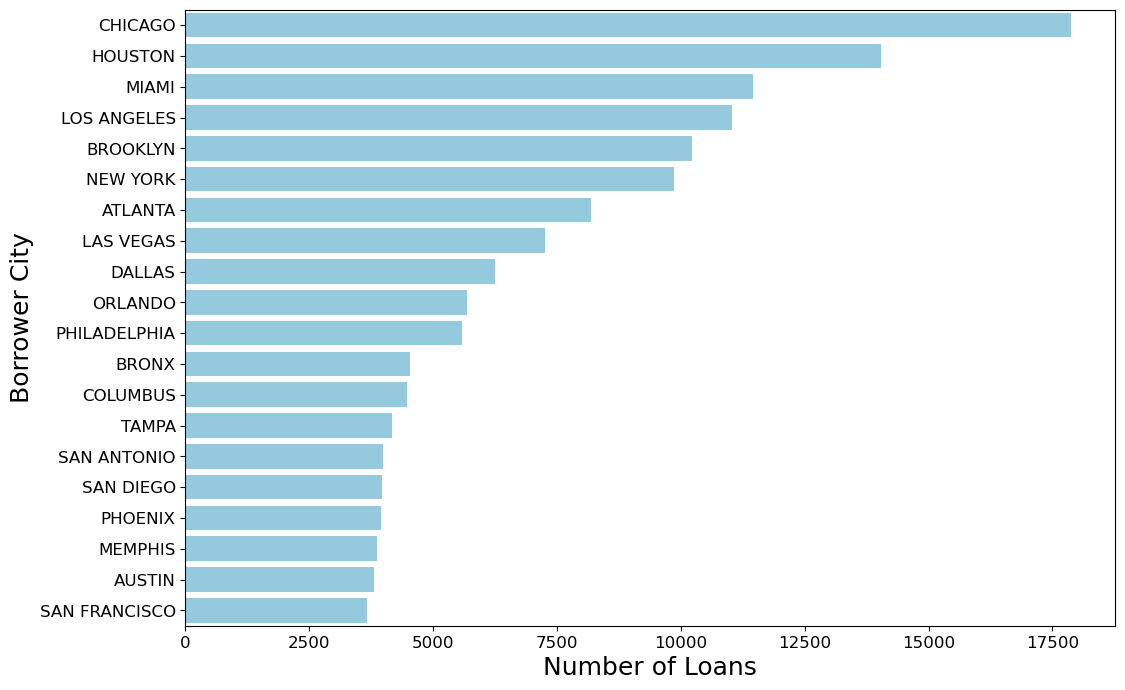

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


all_sampled_data_df['BorrowerCity'] =  all_sampled_data_df['BorrowerCity'].str.upper()
# Count the number of loans for each city
city_counts = all_sampled_data_df['BorrowerCity'].value_counts().reset_index()
city_counts.columns = ['BorrowerCity', 'LoanCount']

# Select the top 20 cities for visualization purposes
top_cities = city_counts.head(20)

# Create a bar plot of the number of loans per city

plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, x='LoanCount', y='BorrowerCity', color='skyblue')
plt.title('', fontsize=18)
plt.xlabel('Number of Loans', fontsize=18)
plt.ylabel('Borrower City', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

file_save_path = 'C:/Users/kosti/OneDrive/Desktop/Data Engineering/Homework2/CovidRecovery/RawData/top_borrower_cities.jpg'
plt.savefig(file_save_path, format='jpg')
plt.close() 

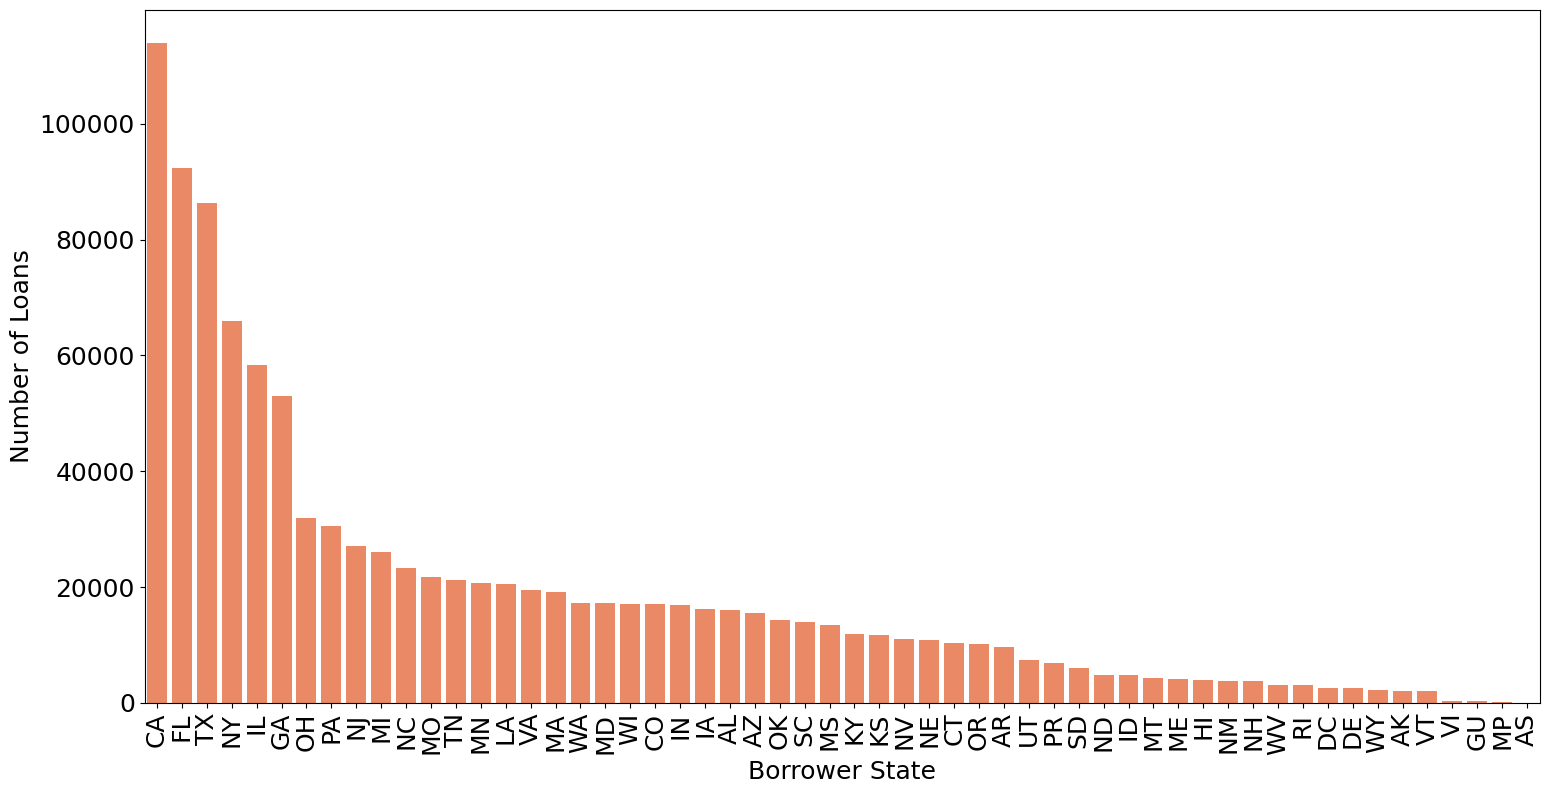

In [11]:
plt.figure(figsize=(18, 9))
sns.countplot(data=all_sampled_data_df, x='BorrowerState', color='coral',order=all_sampled_data_df['BorrowerState'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Borrower State', fontsize=18)
plt.ylabel('Number of Loans', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)  # Rotate x labels to display them better
plt.show()


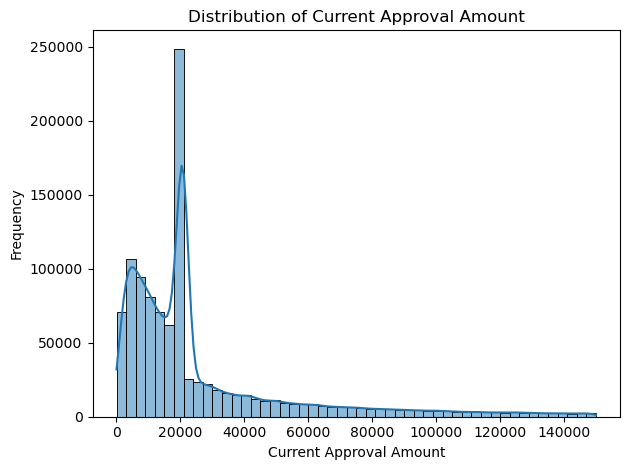

In [12]:

sns.histplot(all_sampled_data_df['CurrentApprovalAmount'], bins=50, kde=True)
plt.title('Distribution of Current Approval Amount')
plt.xlabel('Current Approval Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
# Filter out rows where JobsReported is close to zero (for example, below 10,000)
filtered_df = all_sampled_data_df[all_sampled_data_df['JobsReported'] >= 100]
print(filtered_df.head())

print(filtered_df.info())

      LoanNumber DateApproved                   BorrowerName   BorrowerCity  \
450   6981527709   05/01/2020         TLC HOME CARE SERVICES  GRANADA HILLS   
464   1238197707   05/01/2020               CRAZY GOODY, LLC         SYLMAR   
1484  1560607708   05/01/2020  MESCAL LATH AND PLASTER, INC.         SANGER   
1896  5140587303   04/30/2020             QUALITY AUTOMOTIVE       SARALAND   
2538  1352377706   05/01/2020          HERITAGE EATS WC, LLC   WALNUT CREEK   

     BorrowerState LoanStatusDate    LoanStatus  Term  InitialApprovalAmount  \
450             CA     12/18/2021   Charged Off     1                27228.0   
464             CA     07/22/2021  Paid in Full    24                45000.0   
1484            CA     05/21/2021  Paid in Full    24                63220.0   
1896            AL     05/12/2022  Paid in Full    24                24300.0   
2538            CA     05/22/2021  Paid in Full    24                50000.0   

      CurrentApprovalAmount  UndisbursedAmou

C:\Users\kosti\AppData\Local\Temp\ipykernel_24864\3384257081.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['BusinessTypeCoded'] = filtered_df['BusinessType'].map(business_coded_names)


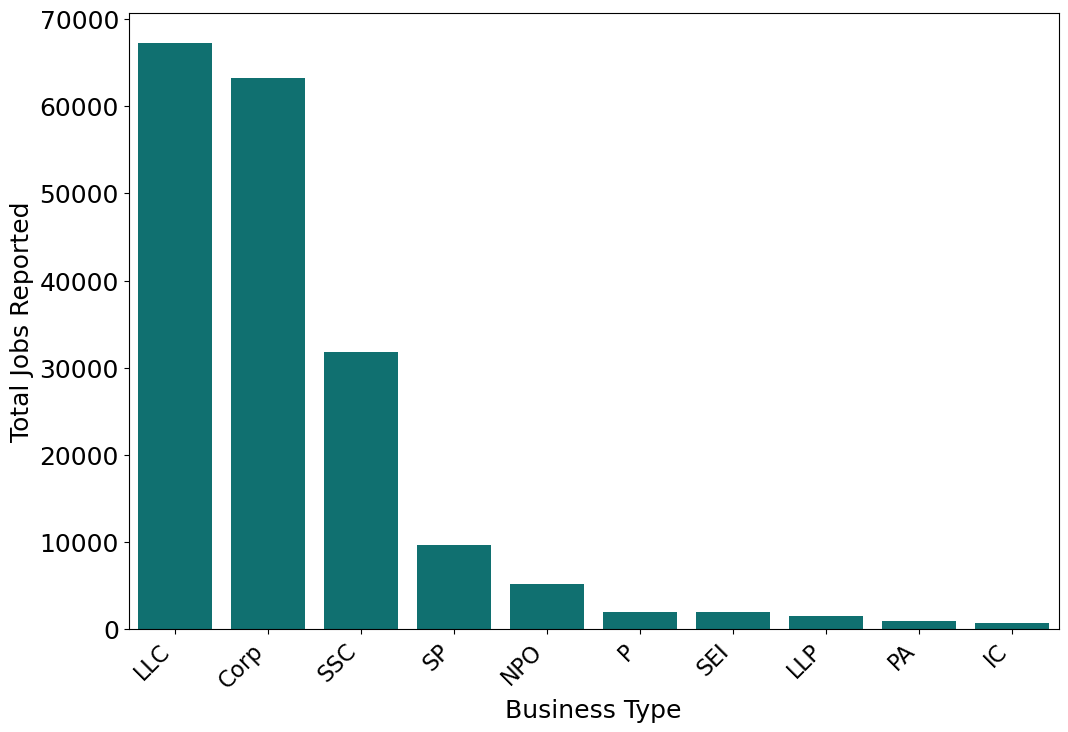

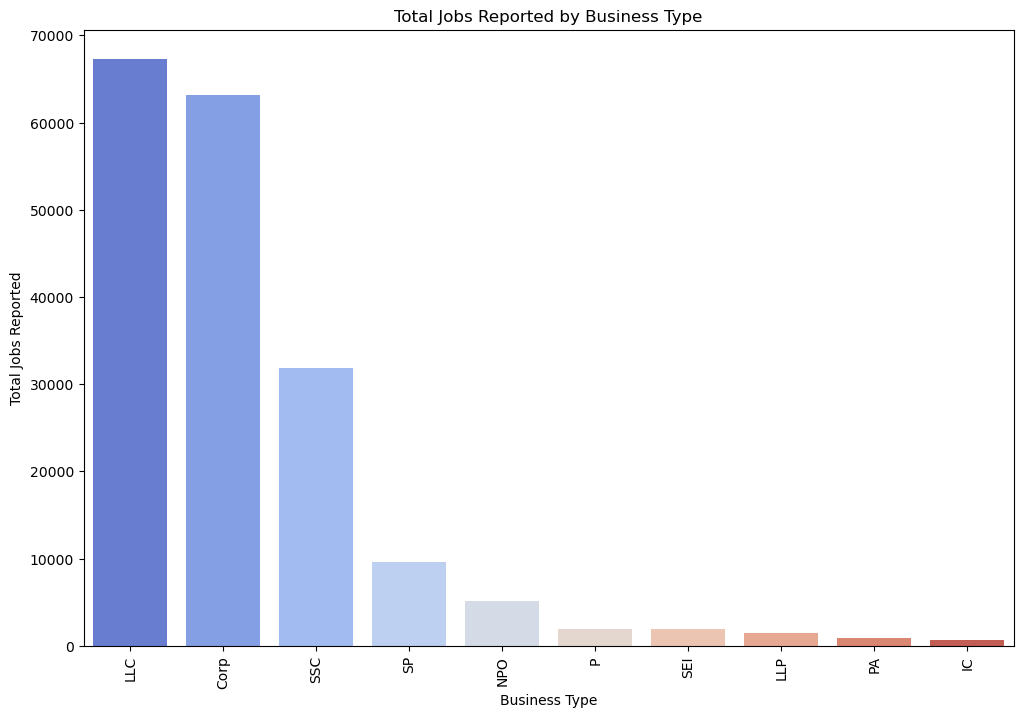

In [17]:
# Create a custom color palette
business_jobs = filtered_df.groupby('BusinessTypeCoded')['JobsReported'].sum().sort_values(ascending=False)
business_coded_names = {
    'Sole Proprietorship': 'SP', 'Limited  Liability Company(LLC)': 'LLC', 'Corporation': 'Corp',
    'Self-Employed Individuals': 'SEI', 'Subchapter S Corporation': 'SSC', 'Independent Contractors': 'IC',
    'Non-Profit Organization': 'NPO', 'Partnership': 'P', 'Single Member LLC': 'SMLLC',
    'Limited Liability Partnership': 'LLP', 'Professional Association': 'PA', '501(c)(3) - Non Profit': '501c3',
    'Cooperative': 'Coop', '501(c)(6) - Non Profit Membership': '501c6', 'Non-Profit Childcare Center': 'NPCC',
    'Trust': 'T', 'Joint Venture': 'JV', 'Qualified Joint-Venture (spouses)': 'QJV', 'Tenant in Common': 'TIC',
    'Housing Co-op': 'HC', '501(c)(19) - Non Profit Veterans': '501c19', 'Employee Stock Ownership Plan(ESOP)': 'ESOP',
    'Tribal Concerns': 'TC', '501(c) - Non Profit except 3, 4, 6, 19': '501cX', 'Rollover as business start-ups (ROBS)': 'ROBS'
}

filtered_df['BusinessTypeCoded'] = filtered_df['BusinessType'].map(business_coded_names)

# Box plot for JobsReported by BusinessType

plt.figure(figsize=(12, 8))
sns.barplot(x=business_jobs.index, y=business_jobs.values, color='teal')
plt.xticks(rotation=45, fontsize=16, ha='right')  # Increased font size for x axis labels
plt.xlabel('Business Type', fontsize=18)  # Increased font size for x axis label
plt.ylabel('Total Jobs Reported', fontsize=18)  # Increased font size for y axis label
plt.yticks(fontsize=18)
plt.show()
custom_palette = sns.color_palette("coolwarm", len(business_jobs))

# Plot the data using the custom color palette
plt.figure(figsize=(12, 8))
sns.barplot(x=business_jobs.index, y=business_jobs.values, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Total Jobs Reported by Business Type')
plt.xlabel('Business Type')
plt.ylabel('Total Jobs Reported')
plt.show()

In [18]:
all_sampled_data_df['BusinessType'].unique()

array(['Corporation', 'Limited  Liability Company(LLC)',
       'Sole Proprietorship', 'Self-Employed Individuals',
       'Subchapter S Corporation', 'Single Member LLC',
       'Non-Profit Organization', 'Partnership',
       'Independent Contractors', 'Limited Liability Partnership',
       'Cooperative', 'Professional Association', 'Joint Venture',
       '501(c)3 – Non Profit', 'Trust', '501(c)6 – Non Profit Membership',
       'Non-Profit Childcare Center', 'Tribal Concerns', nan,
       'Tenant in Common', 'Qualified Joint-Venture (spouses)',
       'Employee Stock Ownership Plan(ESOP)',
       '501(c) – Non Profit except 3,4,6,',
       '501(c)19 – Non Profit Veterans', 'Housing Co-op',
       'Rollover as Business Start-Ups (ROB'], dtype=object)

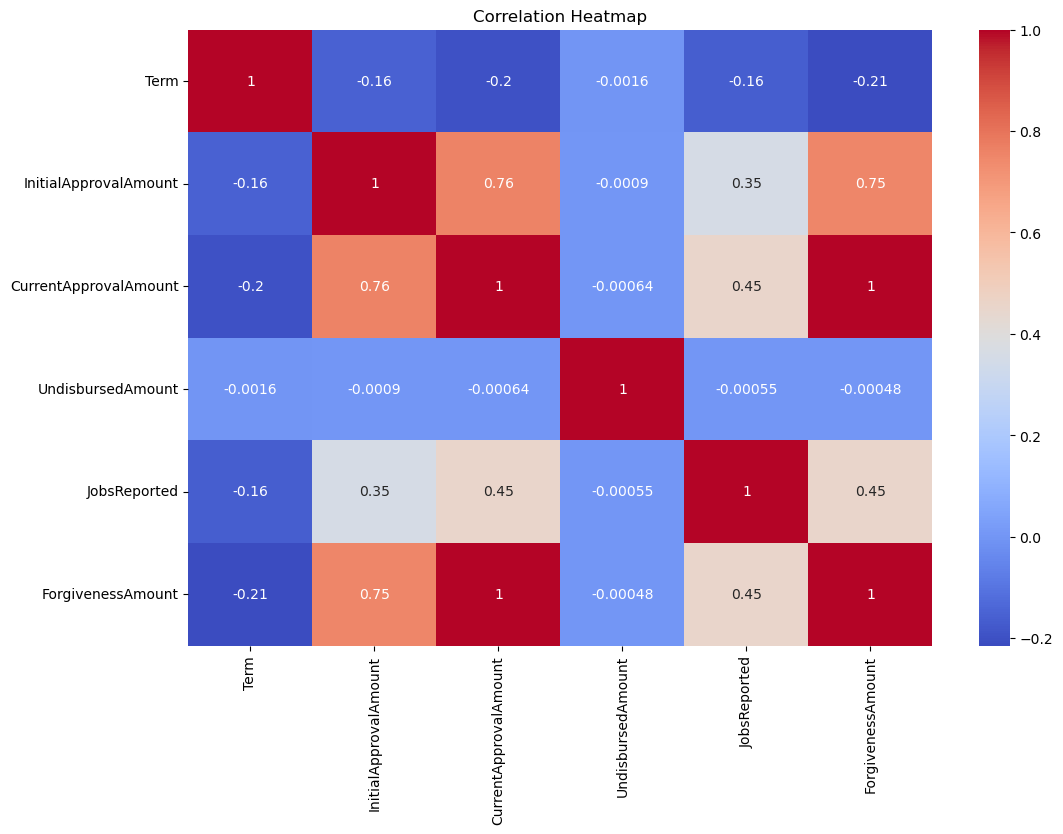

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = all_sampled_data_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
print(all_sampled_data_df.dtypes)

LoanNumber                 object
DateApproved               object
BorrowerName               object
BorrowerCity               object
BorrowerState              object
LoanStatusDate             object
LoanStatus               category
Term                        Int32
InitialApprovalAmount     float32
CurrentApprovalAmount     float32
UndisbursedAmount         float32
JobsReported              float32
Race                       object
Ethnicity                category
BusinessType               object
Gender                   category
ForgivenessAmount         float32
ForgivenessDate            object
dtype: object


In [21]:
# Convert Race and BusinessType to 'category'
all_sampled_data_df['Race'] = all_sampled_data_df['Race'].astype('category')
all_sampled_data_df['BusinessType'] = all_sampled_data_df['BusinessType'].astype('category')
print(all_sampled_data_df.dtypes)

LoanNumber                 object
DateApproved               object
BorrowerName               object
BorrowerCity               object
BorrowerState              object
LoanStatusDate             object
LoanStatus               category
Term                        Int32
InitialApprovalAmount     float32
CurrentApprovalAmount     float32
UndisbursedAmount         float32
JobsReported              float32
Race                     category
Ethnicity                category
BusinessType             category
Gender                   category
ForgivenessAmount         float32
ForgivenessDate            object
dtype: object


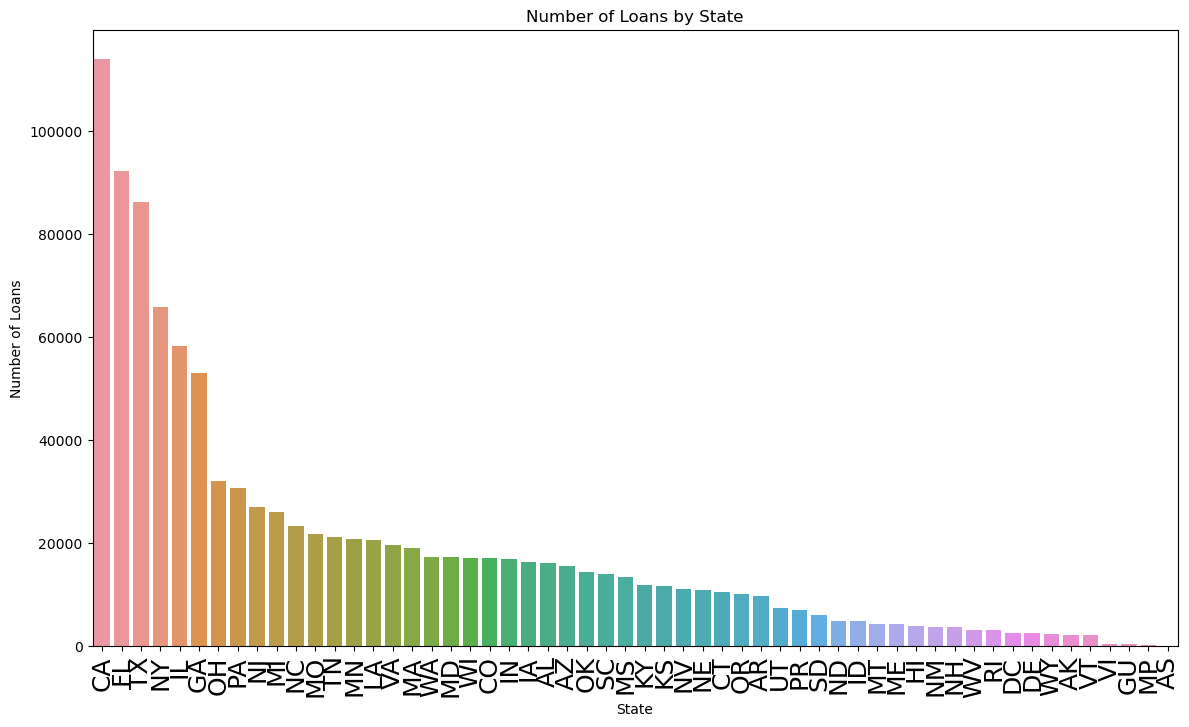

In [22]:
# Number of loans by state
plt.figure(figsize=(14, 8))
state_counts = all_sampled_data_df['BorrowerState'].value_counts()
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xticks(rotation=90, fontsize=18)
plt.title('Number of Loans by State')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.show()

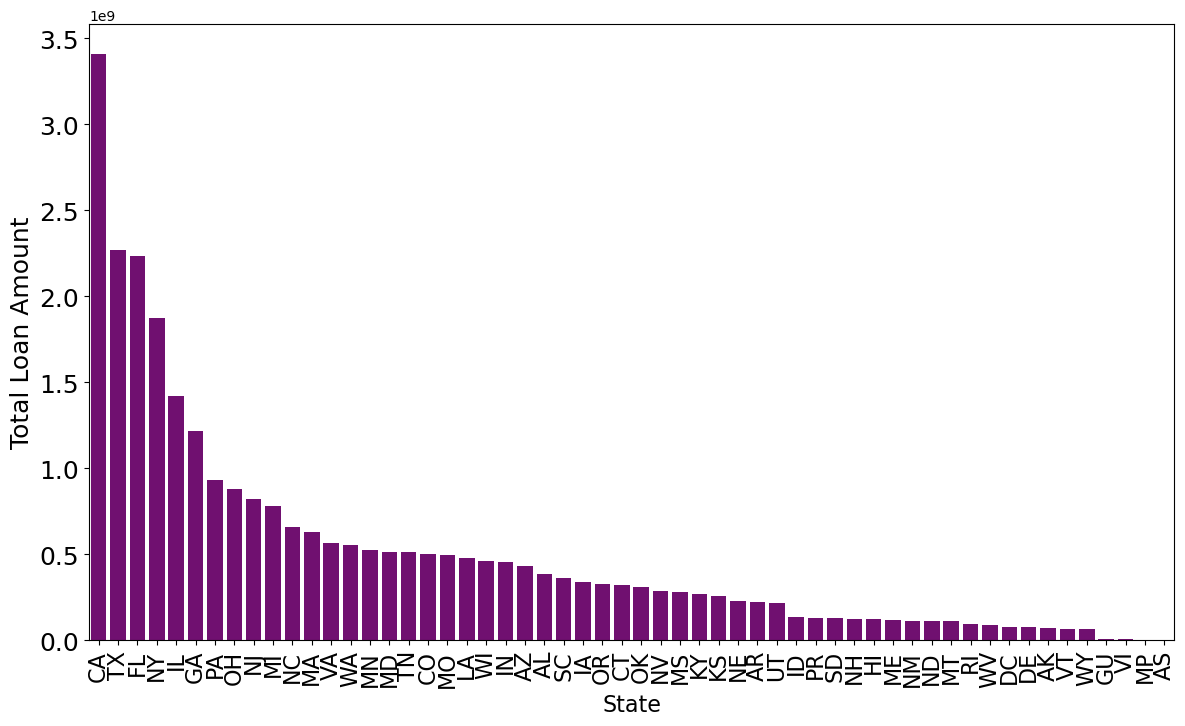

In [23]:
# Total loan amount by state
plt.figure(figsize=(14, 8))
state_loan_amounts = all_sampled_data_df.groupby('BorrowerState')['InitialApprovalAmount'].sum().sort_values(ascending=False)
sns.barplot(x=state_loan_amounts.index, y=state_loan_amounts.values, color='purple')  # Use a different color, e.g., purple
plt.xticks(rotation=90, fontsize=18)  # Increased font size for x axis labels
plt.xlabel('State', fontsize=16)  # Increased font size for x axis label
plt.ylabel('Total Loan Amount', fontsize=18)  # Increased font size for y axis label
plt.xticks(rotation=90, fontsize=16)# Rotate x labels to display them better

# Maintain fontsize, adjust rotation

plt.yticks(fontsize=18)
plt.title('', fontsize=16)
plt.show()

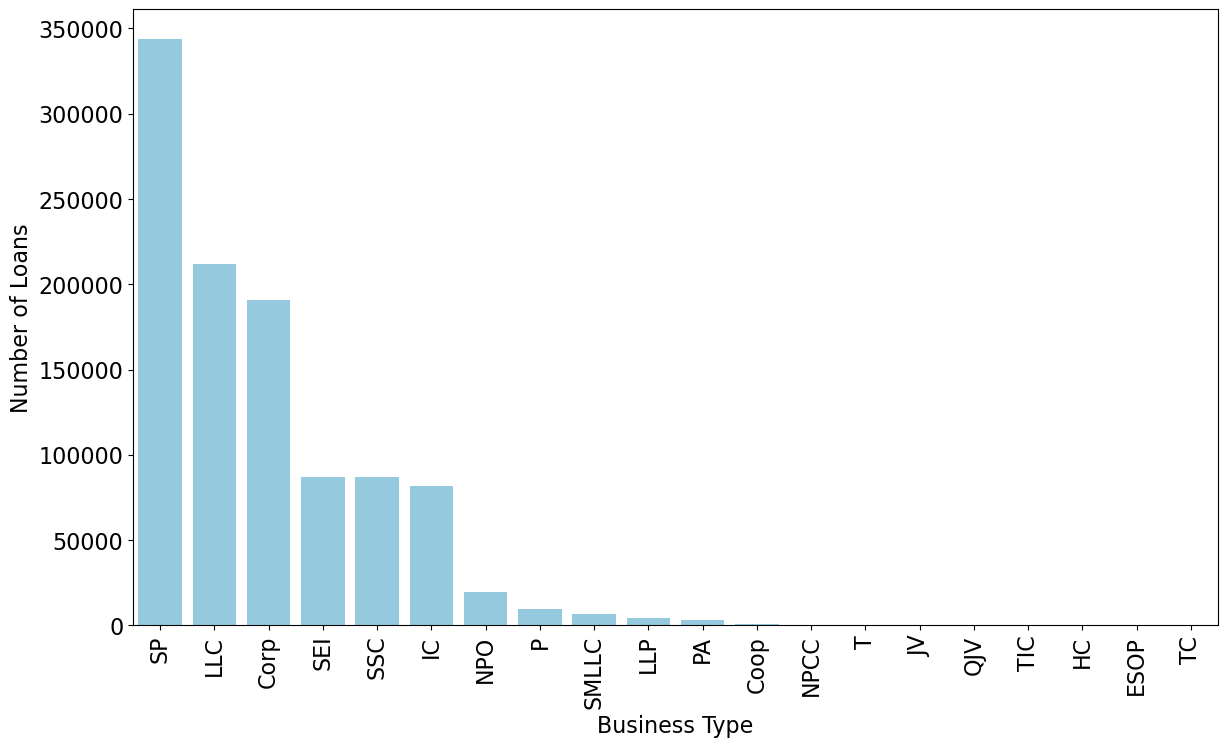

In [24]:

all_sampled_data_df['business_coded_names'] = all_sampled_data_df['BusinessType'].map(business_coded_names)


# Number of loans by business type
plt.figure(figsize=(14, 8))
business_coded_names_counts =all_sampled_data_df['business_coded_names'].value_counts()

sns.barplot(x=business_coded_names_counts.index, y=business_coded_names_counts.values,color='skyblue')
plt.xticks(rotation=90,fontsize=16)
plt.title('')
plt.xlabel('Business Type',fontsize=16)
plt.ylabel('Number of Loans',fontsize=16)
plt.yticks(fontsize=16)
plt.show()

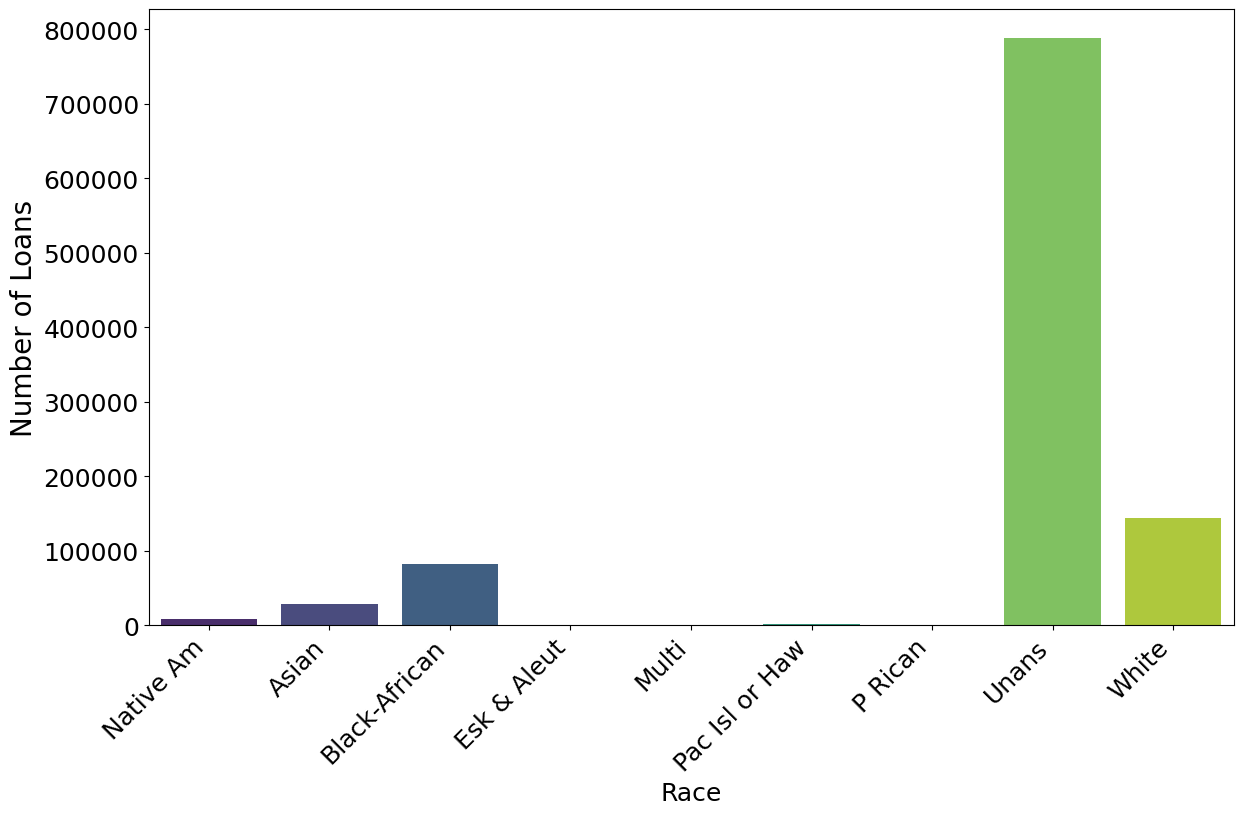

In [25]:
# Insights on demographics: Race and Ethnicity
race_coded_names = {
    'Unanswered': 'Unans',
    'White': 'White',
    'Black or African American': 'Black-African',
    'Asian': 'Asian',
    'American Indian or Alaska Native': 'Native Am',
    'Native Hawaiian or Other Pacific Islander': 'Pac Isl or Haw',
    'Puerto Rican': 'P Rican',
    'Multi Group': 'Multi',
    'Eskimo & Aleut': 'Esk & Aleut'
}

# Replace long names with short names in the DataFrame
all_sampled_data_df['race_coded_names'] = all_sampled_data_df['Race'].map(race_coded_names)

plt.figure(figsize=(14, 8))
race_counts = all_sampled_data_df['race_coded_names'].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.xticks(rotation=45, fontsize=18, ha='right')  # Increased font size for x axis labels and made them diagonal
plt.xlabel('Race', fontsize=18)  # Increased font size for x axis label
plt.ylabel('Number of Loans', fontsize=20)  # Increased font size for y axis label
plt.title('', fontsize=20)  # Increased the font size of the title
plt.yticks(fontsize=18)  # Increased font size for y axis numbers

plt.show() # Increased font

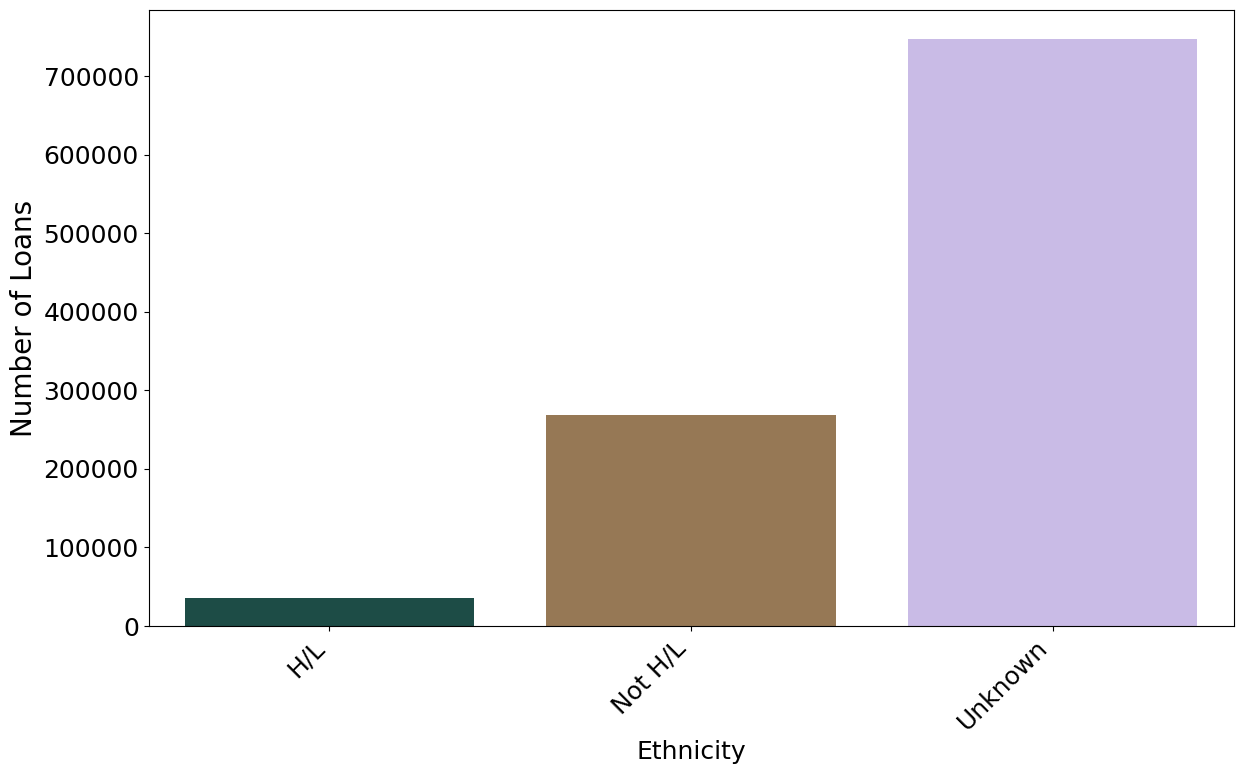

In [26]:
ethnicity_coded_names = {
    'Hispanic or Latino': 'H/L',
    'Not Hispanic or Latino': 'Not H/L',
    'Unknown/NotStated': 'Unknown'
}
all_sampled_data_df['ethnicity_coded_names'] = all_sampled_data_df['Ethnicity'].map(ethnicity_coded_names)

# Insights on demographics: Ethnicity
plt.figure(figsize=(14, 8))
ethnicity_counts = all_sampled_data_df['ethnicity_coded_names'].value_counts()
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette='cubehelix')
plt.xticks(rotation=45, fontsize=18, ha='right')  # Increased font size for x axis labels and made them diagonal
plt.xlabel('Ethnicity', fontsize=18)  # Increased font size for x axis label
plt.ylabel('Number of Loans', fontsize=20)  # Increased font size for y axis label
plt.yticks(fontsize=18)  # Increased font size for y axis numbers

plt.show()

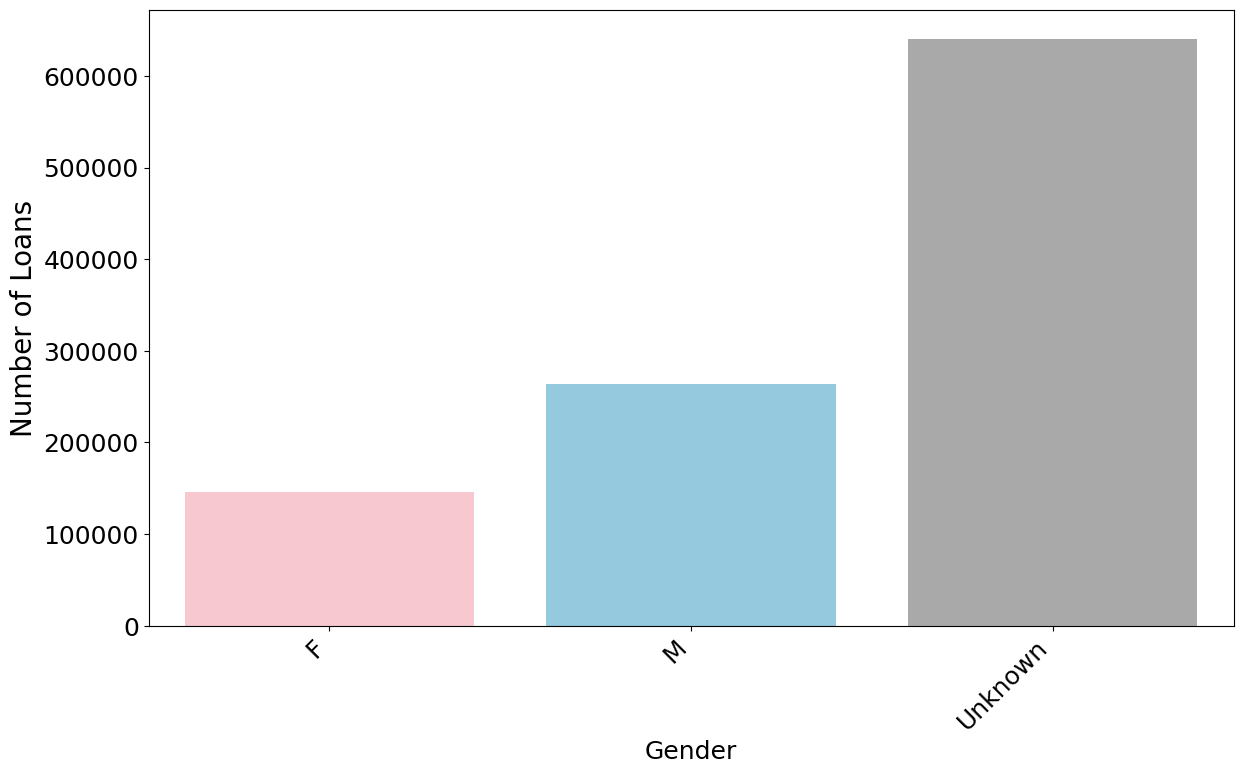

In [27]:
gender_coded_names = {
    'Female Owned': 'F',
    'Male Owned': 'M',
    'Unanswered': 'Unknown'
}
all_sampled_data_df['gender_coded_names'] = all_sampled_data_df['Gender'].map(gender_coded_names)

custom_colors = ['pink', 'skyblue', 'darkgrey']


# Insights on demographics: Gender
plt.figure(figsize=(14, 8))
gender_counts = all_sampled_data_df['gender_coded_names'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=custom_colors)
plt.xticks(rotation=45, fontsize=18, ha='right')  # Increased font size for x axis labels and made them diagonal
plt.xlabel('Gender', fontsize=18)  # Increased font size for x axis label
plt.ylabel('Number of Loans', fontsize=20)  # Increased font size for y axis label
plt.yticks(fontsize=18)  # Increased font size for y axis numbers

plt.show()

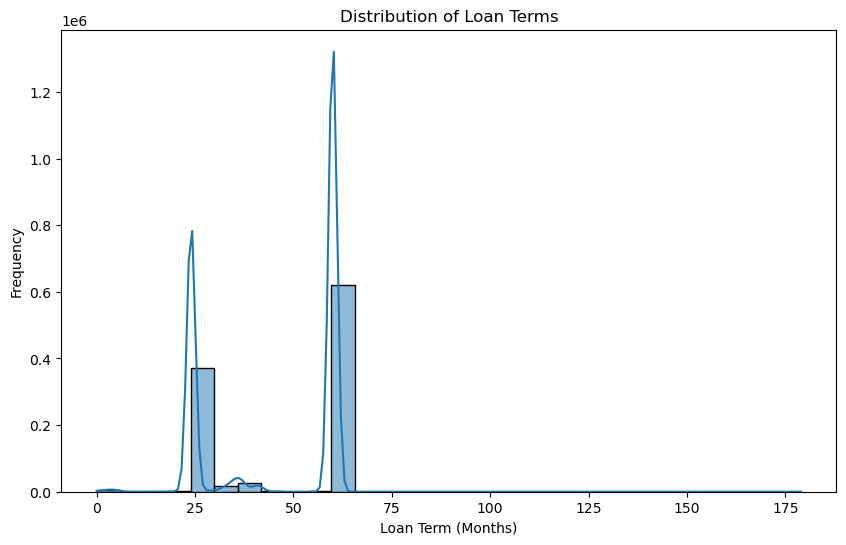

In [28]:
# Check the distribution of loan terms
plt.figure(figsize=(10, 6))
sns.histplot(all_sampled_data_df['Term'], bins=30, kde=True)
plt.title('Distribution of Loan Terms')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Frequency')
plt.show()

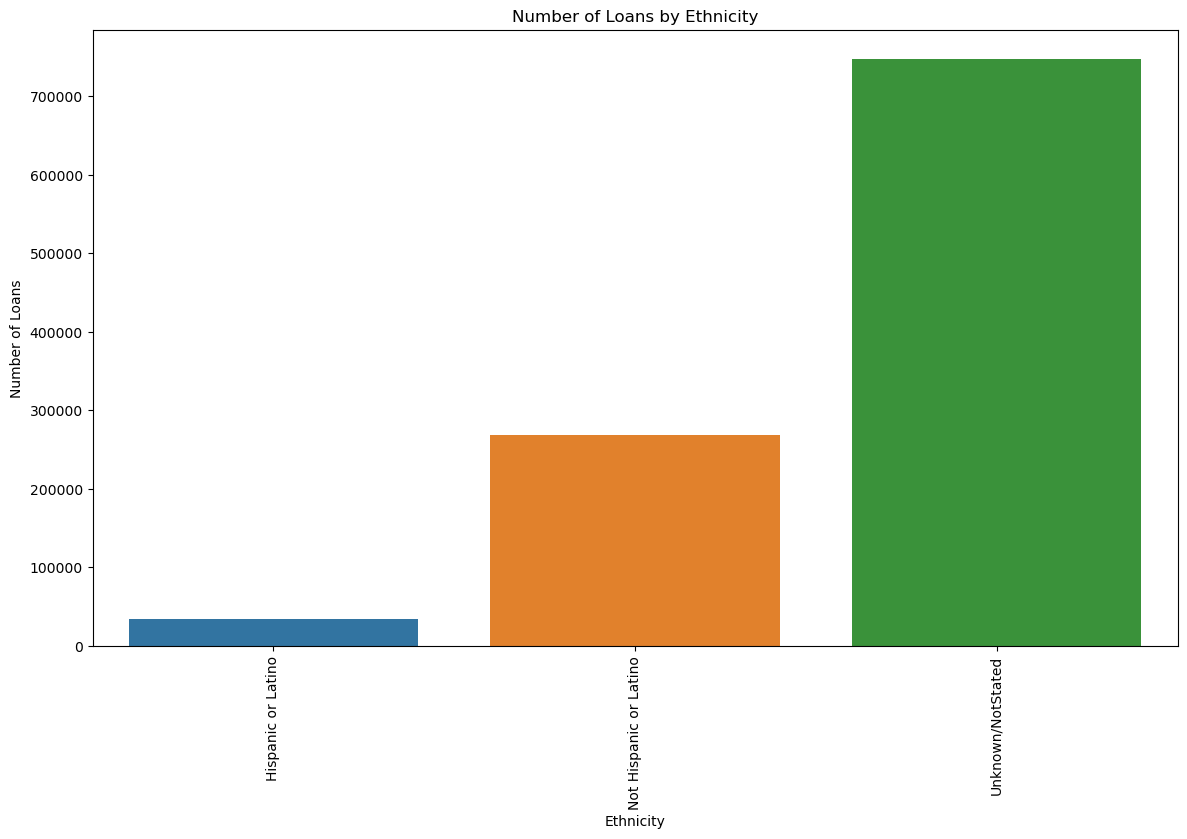

In [29]:
plt.figure(figsize=(14, 8))
ethnicity_counts =all_sampled_data_df['Ethnicity'].value_counts()
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Loans by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Loans')
plt.show()


**OUTPUT DATA SECTION**

In [30]:
# Step 1: Aggregate loan amounts by state
state_loan_totals = all_sampled_data_df.groupby('BorrowerState')['CurrentApprovalAmount'].sum().reset_index()
state_loan_totals.rename(columns={'CurrentApprovalAmount': 'TotalLoanAmount'}, inplace=True)
#print(state_loan_totals)


In [32]:
# Step 2: Merge Loan data with population estimates
# Extract only the relevant columns from population data
pop_est_df_relevant = pop_est_df[['STNAME', 'POPESTIMATE2020']]
pop_est_df_relevant = pop_est_df_relevant.groupby('STNAME').sum().reset_index()

print(pop_est_df_relevant)

                  STNAME  POPESTIMATE2020
0                Alabama          9843064
1                 Alaska          1462316
2                Arizona         14842802
3               Arkansas          6061044
4             California         78736156
5               Colorado         11615438
6            Connecticut          7114012
7               Delaware          1973618
8   District of Columbia          1425632
9                Florida         43466624
10               Georgia         21420034
11                Hawaii          2814012
12                 Idaho          3653826
13              Illinois         25175060
14               Indiana         13509906
15                  Iowa          6327122
16                Kansas          5827610
17              Kentucky          8954502
18             Louisiana          9290636
19                 Maine          2700282
20              Maryland         12111604
21         Massachusetts         13787148
22              Michigan         1

We observe that while in the PPP data the state name is denoted by only 2 letters , in the population estimate the state is defined by the whole name of the state and that will be a problem when we will try to merge those. We have to do again a mapping in order to map the coded state name of the one dataset (PPP data) with the state name of the other dataset.

In [33]:
# Dictionary to map state decoded states to full state names
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 
    'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 
    'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'AS': 'American Samoa', 'GU': 'Guam', 'MP': 'Northern Mariana Islands', 'VI': 'Virgin Islands'
}

In [34]:
# Aggregate loan amounts by state
state_loan_totals = all_sampled_data_df.groupby('BorrowerState')['CurrentApprovalAmount'].sum().reset_index()
state_loan_totals.rename(columns={'CurrentApprovalAmount': 'TotalLoanAmount'}, inplace=True)

# Map state abbreviations to full state names
state_loan_totals['BorrowerState'] = state_loan_totals['BorrowerState'].map(state_mapping)
print(state_loan_totals)

               BorrowerState  TotalLoanAmount
0                     Alaska     7.209038e+07
1                    Alabama     3.836149e+08
2                   Arkansas     2.245570e+08
3             American Samoa     6.151612e+05
4                    Arizona     4.274727e+08
5                 California     3.367008e+09
6                   Colorado     4.957762e+08
7                Connecticut     3.208443e+08
8       District of Columbia     7.934364e+07
9                   Delaware     7.489739e+07
10                   Florida     2.194536e+09
11                   Georgia     1.194599e+09
12                      Guam     9.967102e+06
13                    Hawaii     1.202313e+08
14                      Iowa     3.431319e+08
15                     Idaho     1.348688e+08
16                  Illinois     1.412762e+09
17                   Indiana     4.530556e+08
18                    Kansas     2.611003e+08
19                  Kentucky     2.685509e+08
20                 Louisiana     4

In [40]:
# Summarize population estimates by state
pop_est_df_relevant = pop_est_df[['STNAME', 'POPESTIMATE2020']]
pop_est_df_relevant = pop_est_df_relevant.groupby('STNAME')['POPESTIMATE2020'].sum().reset_index()

In [41]:
# Merge PPP data with population estimation data
merged_df = state_loan_totals.merge(pop_est_df_relevant, left_on='BorrowerState', right_on='STNAME', how='left')

# Display the merged DataFrame
print(merged_df)

               BorrowerState  TotalLoanAmount                STNAME  \
0                     Alaska     7.209038e+07                Alaska   
1                    Alabama     3.836149e+08               Alabama   
2                   Arkansas     2.245570e+08              Arkansas   
3             American Samoa     6.151612e+05                   NaN   
4                    Arizona     4.274727e+08               Arizona   
5                 California     3.367008e+09            California   
6                   Colorado     4.957762e+08              Colorado   
7                Connecticut     3.208443e+08           Connecticut   
8       District of Columbia     7.934364e+07  District of Columbia   
9                   Delaware     7.489739e+07              Delaware   
10                   Florida     2.194536e+09               Florida   
11                   Georgia     1.194599e+09               Georgia   
12                      Guam     9.967102e+06                   NaN   
13    

In [46]:
# Calculate Total Loan Amount per 100k residents
merged_df['TotalLoanAmountPer100kResidents'] = (merged_df['TotalLoanAmount'] / merged_df['POPESTIMATE2020']) * 100000

In [55]:
print(merged_df.head(10))
print(merged_df.info())

           BorrowerState   TotalLoanAmount                STNAME  \
31          North Dakota    115,378,856.00          North Dakota   
45          South Dakota    131,262,912.00          South Dakota   
32              Nebraska    231,835,296.00              Nebraska   
16              Illinois  1,412,761,728.00              Illinois   
11               Georgia  1,194,599,040.00               Georgia   
8   District of Columbia     79,343,640.00  District of Columbia   
55               Wyoming     64,247,328.00               Wyoming   
14                  Iowa    343,131,936.00                  Iowa   
51               Vermont     65,222,280.00               Vermont   
20             Louisiana    478,641,152.00             Louisiana   

    POPESTIMATE2020 TotalLoanAmountPer100kResidents  
31     1,530,618.00                    7,538,056.92  
45     1,785,434.00                    7,351,877.02  
32     3,875,104.00                    5,982,685.78  
16    25,175,060.00                

In [56]:
# Remove rows with NaN values
merged_df = merged_df.dropna()


In [57]:
print(merged_df.head())
print(merged_df.info())

   BorrowerState   TotalLoanAmount        STNAME  POPESTIMATE2020  \
31  North Dakota    115,378,856.00  North Dakota     1,530,618.00   
45  South Dakota    131,262,912.00  South Dakota     1,785,434.00   
32      Nebraska    231,835,296.00      Nebraska     3,875,104.00   
16      Illinois  1,412,761,728.00      Illinois    25,175,060.00   
11       Georgia  1,194,599,040.00       Georgia    21,420,034.00   

   TotalLoanAmountPer100kResidents  
31                    7,538,056.92  
45                    7,351,877.02  
32                    5,982,685.78  
16                    5,611,751.19  
11                    5,577,017.48  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 31 to 54
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BorrowerState                    51 non-null     object 
 1   TotalLoanAmount                  51 non-null     object 
 2   STNAME 

In [58]:
print(merged_df)

           BorrowerState   TotalLoanAmount                STNAME  \
31          North Dakota    115,378,856.00          North Dakota   
45          South Dakota    131,262,912.00          South Dakota   
32              Nebraska    231,835,296.00              Nebraska   
16              Illinois  1,412,761,728.00              Illinois   
11               Georgia  1,194,599,040.00               Georgia   
8   District of Columbia     79,343,640.00  District of Columbia   
55               Wyoming     64,247,328.00               Wyoming   
14                  Iowa    343,131,936.00                  Iowa   
51               Vermont     65,222,280.00               Vermont   
20             Louisiana    478,641,152.00             Louisiana   
29               Montana    110,943,240.00               Montana   
10               Florida  2,194,535,680.00               Florida   
0                 Alaska     72,090,384.00                Alaska   
37              New York  1,854,199,936.00      

In [62]:
# Save the merged DataFrame to a CSV file

output_path = r"C:\Users\kosti\OneDrive\Desktop\Data Engineering\Homework2\CovidRecovery\Output\Total_Loan_Amount_per_100k_residents.csv"

# Saving the dataframe
merged_df.to_csv(output_path, index=False)

In [63]:
# Format the columns to display numbers with fewer decimal points
pd.options.display.float_format = '{:,.2f}'.format

# Convert the necessary columns to display numbers in a readable format
merged_df['TotalLoanAmount'] = merged_df['TotalLoanAmount'].astype(float).map('{:,.2f}'.format)
merged_df['TotalLoanAmountPer100kResidents'] = merged_df['TotalLoanAmountPer100kResidents'].astype(float).map('{:,.2f}'.format)



ValueError: could not convert string to float: '115,378,856.00'

In [61]:
merged_df = merged_df.sort_values(by='TotalLoanAmountPer100kResidents', ascending=False)

# Select the top 20 rows
top_20_df = merged_df.head(20)
data_sorted = data.sort_values(by='POPESTIMATE2020', ascending=False)
# Save the top 20 rows as an HTML file for reporting
top_20_df.to_html('C:/Users/kosti/OneDrive/Desktop/Data Engineering/Homework2/CovidRecovery/Output/top_20_merged_dataframe.html', index=False)

# Display the formatted dataframe
print(top_20_df)

           BorrowerState   TotalLoanAmount                STNAME  \
31          North Dakota    115,378,856.00          North Dakota   
45          South Dakota    131,262,912.00          South Dakota   
32              Nebraska    231,835,296.00              Nebraska   
16              Illinois  1,412,761,728.00              Illinois   
11               Georgia  1,194,599,040.00               Georgia   
8   District of Columbia     79,343,640.00  District of Columbia   
55               Wyoming     64,247,328.00               Wyoming   
14                  Iowa    343,131,936.00                  Iowa   
51               Vermont     65,222,280.00               Vermont   
20             Louisiana    478,641,152.00             Louisiana   
29               Montana    110,943,240.00               Montana   
10               Florida  2,194,535,680.00               Florida   
0                 Alaska     72,090,384.00                Alaska   
37              New York  1,854,199,936.00      